# Cyclistic Bike-Share Case Study

Olojede Joseph 

27/03/2024

## INTRODUCTION

Cyclistic, a fictional bike-share company, was established in 2016 and is headquartered in the vibrant city of Chicago. With a robust infrastructure comprising over 5,800 bicycles and 600 docking stations strategically positioned across the city, Cyclistic has become a prominent player in the urban mobility landscape. 


Since its inception, the program has expanded significantly, now boasting a fleet of 5,824 bicycles meticulously tracked via geotracking technology. These bicycles are securely locked into a vast network of 692 stations strategically distributed throughout the city of Chicago.


As a Junior Data Analyst at Cyclistic, my current assignment involves conducting a comprehensive analysis of the company's bike share program. The primary objectives of this analysis are to discern the distinctions between annual members and casual riders, explore the motivations behind casual riders' potential acquisition of a membership, and evaluate the potential impact of digital media on the company's marketing strategies.



# ASK

The overarching business goal is to leverage data analysis to gain insights into the utilization patterns of Cyclistic's bike-share service. By understanding how customers interact with the service, Cyclistic aims to optimize operations, enhance customer experience, and inform strategic decision-making to drive business growth and success.

**Guiding questons regarding the marketing program:** 
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

**Key Stakeholders**
1. Lily Moreno: Director of Marketing.
2. Cyclistic Executive team: Decides whether or not to approve the recommended  course of action for improving customer service.
3. Cyclistic Marketing analytics team:: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.

# PREPARE
The public data which explored riders usage  patterns in the city's bike share system used for this analysis is <a href="[url](https://divvy-tripdata.s3.amazonaws.com/index.html" target="_blank">Cyclistic Trip Data</a>. The data has been made available by Motivate International Inc.
The dataset contains information on the following:
* ride id
* types of bikes(electric or classic).
* location: latitude and longitude.


* time: start time, end time.
* location they started riding  from (start station) and the place they ended up at (end station).
* The types of riders(members or casual).


Using the 2023 dataset, which is the most recent available, allows us to observe current trends in bike share program usage. With over 5 million entries and 12 columns, the dataset provides a comprehensive overview of rider behavior and patterns, enabling us to conduct a thorough analysis of Cyclistic's operations and customer preferences.

# PROCESS
Load packages and set up environment for analysis.

# Import necessary libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import seaborn as sns
import datetime

**Importing datasets**

Eleven dataseets were used for this analysis comprising of eleven months of the data collection. They include data on the riders type, location, time started and ended riding etc.

Two columns, ['started_at', 'ended_at'] were converted to date time values using the parse_dates function.

In [3]:
trip_2023_01 = pd.read_csv('2023_DataSets/2023_01.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_02 = pd.read_csv('2023_DataSets/2023_02.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_03 = pd.read_csv('2023_DataSets/2023_03.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_04 = pd.read_csv('2023_DataSets/2023_04.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_05 = pd.read_csv('2023_DataSets/2023_05.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_06 = pd.read_csv('2023_DataSets/2023_06.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_07 = pd.read_csv('2023_DataSets/2023_07.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_08 = pd.read_csv('2023_DataSets/2023_08.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_09 = pd.read_csv('2023_DataSets/2023_09.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_10 = pd.read_csv('2023_DataSets/2023_10.csv', parse_dates=['started_at', 'ended_at'])
trip_2023_11 = pd.read_csv('2023_DataSets/2023_11.csv', parse_dates=['started_at', 'ended_at'])

**Merging the datasets.**

The eleven datasets were merged togeter so the analysis can be done together and trends and observations can be seen concurrently together.

In [4]:
concat_dataset_2023 = [trip_2023_01, trip_2023_02, trip_2023_03, trip_2023_04,\
                       trip_2023_05, trip_2023_06, trip_2023_07, trip_2023_08,\
                        trip_2023_09, trip_2023_10, trip_2023_11]

year_2023 = pd.concat(concat_dataset_2023, ignore_index=True)


**Brief overview of the dataset.**

In [5]:
year_2023.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual


**Summary of numerical data.**

In [6]:
year_2023.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng
count,5495804,5495804,5.495804e+06,5.495804e+06,5.489053e+06,5.489053e+06
mean,2023-07-10 06:47:12.699673600,2023-07-10 07:05:34.516624384,4.190293e+01,-8.764698e+01,4.190327e+01,-8.764715e+01
min,2023-01-01 00:01:58,2023-01-01 00:02:41,4.163000e+01,-8.794000e+01,0.000000e+00,-8.816000e+01
25%,2023-05-18 18:15:14.500000,2023-05-18 18:32:05.750000128,4.188096e+01,-8.766000e+01,4.188103e+01,-8.766027e+01
50%,2023-07-16 13:09:35.500000,2023-07-16 13:30:46,4.189921e+01,-8.764400e+01,4.190000e+01,-8.764410e+01
75%,2023-09-09 12:49:02.750000128,2023-09-09 13:10:32,4.193000e+01,-8.762991e+01,4.193000e+01,-8.762991e+01
max,2023-11-30 23:59:14,2023-12-01 20:42:31,4.207000e+01,-8.746000e+01,4.218000e+01,0.000000e+00
std,NaN,NaN,4.508941e-02,2.735129e-02,5.481862e-02,7.038253e-02


**No of data entries.**

In [7]:
print(f'The total number of entries are {len(year_2023)}.')

The total number of entries are 5495804.


No of riders(members)

In [8]:
no_member_riders = year_2023['member_casual'] == 'member'
no_casual_riders = year_2023['member_casual'] == 'casual'


print(f'No of riders that were members and casuals were found\
 to be {no_member_riders.sum()} and {no_casual_riders.sum()} respectively.')

No of riders that were members and casuals were found to be 3488297 and 2007507 respectively.


# Data Cleaning and Validation

**Data Validation.**

The data validation feature allows you to specify a range of cells that contain valid values for input in other cells. When the user enters an invalid value

It is useful to make sure there are no errors in the course of analysis. E.g Making sure the the time column is in date time format.

In [9]:
year_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495804 entries, 0 to 5495803
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 545.1+ MB


Dropped four columns that were not relevant to the analysis.

In [10]:
year_2023.drop(axis=1, columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'], inplace=True)

Checked for duplicate values.

In [11]:
duplicate = year_2023.duplicated()
duplicate.sum()

0

Removed rows with empty values.

In [12]:
year_2023.isna().sum()

year_2023.dropna(inplace=True)

year_2023.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
dtype: int64

# Analysis.

1. Created a column called ride_length  in the Rides table. This calculates the total ride time.

2. Created a new column called month from the column 'started_at' to check the days when people rode.

3. Created a new column called 'day_of_week' to check the day of the week a ride was taken.

In [13]:
# Ride_length column created.
year_2023['ride_length'] = year_2023['ended_at'] - year_2023['started_at']

hours = year_2023['ride_length'].dt.components['hours']
minutes = year_2023['ride_length'].dt.components['minutes']
seconds = year_2023['ride_length'].dt.components['seconds']

# The ride_length column was mapped to allow for analysis to be done on this new coluumn.
year_2023['ride_length'] = hours.map("{:02}".format)\
      + ":" + minutes.map("{:02}".format) + ":"\
        + seconds.map("{:02}".format)

# Month column was created.
year_2023['month'] = year_2023['started_at'].dt.month_name()

# Day_of_week column was created.
year_2023['day_of_week'] = year_2023['started_at'].dt.strftime('%A')

**'Ride_length' column to timedelta values.**

Conversion of 'Ride_length' column that was in date-time values to 
timedelta allows for:
1. Easier calcuations.
2. Analysis.
3. Efficiency.

In [14]:
year_2023['ride_length'] = pd.to_timedelta(year_2023['ride_length'])

Most Frequented Start Station.


In [15]:
top_frequented_start_station = year_2023['start_station_name'].value_counts(ascending=False)
print(top_frequented_start_station.head(10))

most_frequented_start_station = top_frequented_start_station.idxmax()
print(f'The most frequented start staion is {most_frequented_start_station}.')

start_station_name
Streeter Dr & Grand Ave               58732
DuSable Lake Shore Dr & Monroe St     37356
Michigan Ave & Oak St                 34238
DuSable Lake Shore Dr & North Blvd    32833
Clark St & Elm St                     31537
Kingsbury St & Kinzie St              30579
Wells St & Concord Ln                 28916
Clinton St & Washington Blvd          28511
Theater on the Lake                   27739
Millennium Park                       27374
Name: count, dtype: int64
The most frequented start staion is Streeter Dr & Grand Ave.


**Most Frequented End Station.**

In [16]:
top_frequented_end_station = year_2023['end_station_name'].value_counts(ascending=False)
print(top_frequented_end_station.head(10))

most_frequented_end_station = top_frequented_end_station.idxmax()
print(f'The most frequented end staion is {most_frequented_end_station}.')

end_station_name
Streeter Dr & Grand Ave               60839
DuSable Lake Shore Dr & North Blvd    37004
DuSable Lake Shore Dr & Monroe St     35576
Michigan Ave & Oak St                 35217
Clark St & Elm St                     30943
Kingsbury St & Kinzie St              29966
Wells St & Concord Ln                 29824
Clinton St & Washington Blvd          29178
Theater on the Lake                   28717
Millennium Park                       28676
Name: count, dtype: int64
The most frequented end staion is Streeter Dr & Grand Ave.


**Histogram plot showing Number of Rides with Maximum Time Length by Member Type'.**

0 days 23:59:59


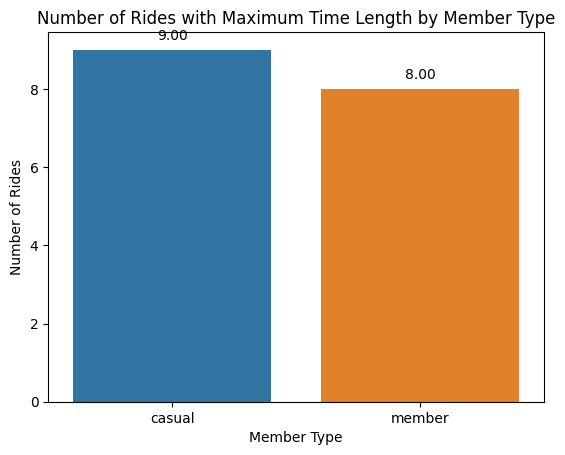

In [17]:
max_ride_length_row = year_2023[year_2023['ride_length'] == year_2023['ride_length'].max()]
print(year_2023['ride_length'].max())
max_ride_length_row = max_ride_length_row.pivot_table(columns='member_casual', values='ride_id', aggfunc=len)
ax = sns.barplot(data=max_ride_length_row)

# Set the title and axis labels
plt.title('Number of Rides with Maximum Time Length by Member Type')
plt.xlabel('Member Type')
plt.ylabel('Number of Rides')

for p in ax.patches:
    ax.\
    annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2.,\
                                        p.get_height()), ha='center', va='center',\
                                          xytext=(0, 10), textcoords='offset points')

**Histogram plot showing Number of Rides by Rideable_type'.**

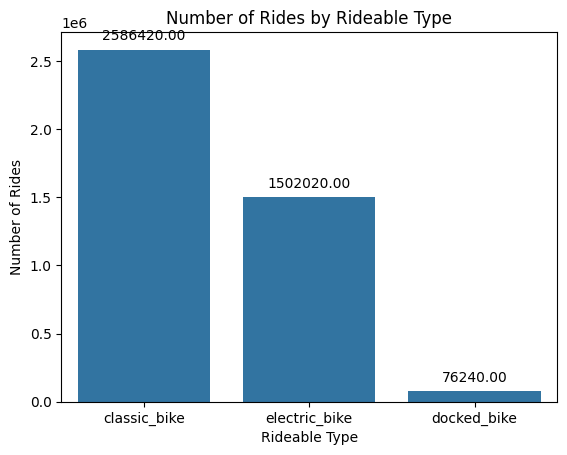

In [18]:
no_of_ride_by_rideable_type = year_2023.groupby('rideable_type')['ride_id'].agg('count')

ride_by_rideable_type_sorted = no_of_ride_by_rideable_type.sort_values(ascending=False)

ax = sns.barplot(data=ride_by_rideable_type_sorted)

# Set the title and axis labels
plt.title('Number of Rides by Rideable Type')
plt.xlabel('Rideable Type')
plt.ylabel('Number of Rides')

for p in ax.patches:
    ax.\
    annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2.,\
                                        p.get_height()), ha='center', va='center',\
                                          xytext=(0, 10), textcoords='offset points')

**Created various variables to depict:**

1. The average ride length by type of riders.

2. The average ride length by day of week.

3. The number of users by day of week.

In [19]:
avg_ride_length_by_type_of_riders = year_2023.\
    pivot_table(values='ride_length', index='member_casual', aggfunc=(np.mean))

avg_ride_length_by_day_of_week = year_2023.\
    pivot_table(columns='day_of_week', index='member_casual', values='ride_length', aggfunc=np.mean)

number_users_by_day_of_week = year_2023.\
    pivot_table(index='day_of_week', columns='member_casual', aggfunc='count', fill_value=0, values='ride_id')

C:\Users\user\AppData\Local\Temp\ipykernel_7896\1596224512.py:2: FutureWarning: The provided callable <function mean at 0x0000024F9267B9C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table(values='ride_length', index='member_casual', aggfunc=(np.mean))
C:\Users\user\AppData\Local\Temp\ipykernel_7896\1596224512.py:5: FutureWarning: The provided callable <function mean at 0x0000024F9267B9C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table(columns='day_of_week', index='member_casual', values='ride_length', aggfunc=np.mean)


Barplot to depict the Number of Rides by member types.

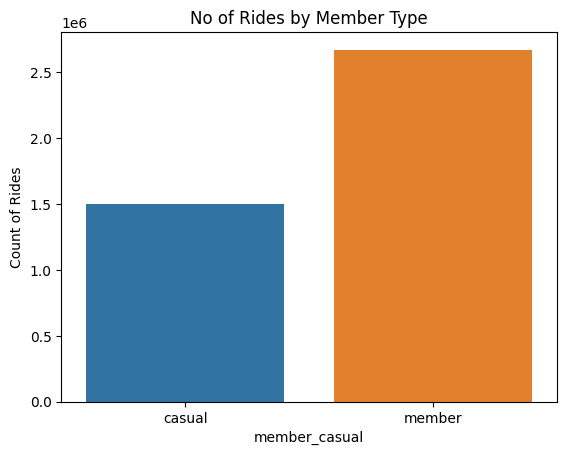

In [26]:
no_of_rides_by_member_type = year_2023\
    .pivot_table(values='ride_id', columns='member_casual', aggfunc='count')

sns.barplot(data=no_of_rides_by_member_type.reset_index())
plt.title('No of Rides by Member Type')
plt.ylabel('Count of Rides')

for p in ax.patches:
    ax.\
    annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2.,\
                                        p.get_height()), ha='center', va='center',\
                                          xytext=(0, 10), textcoords='offset points')

Created a barplot to visualize the member types by the "average ride length in seconds".

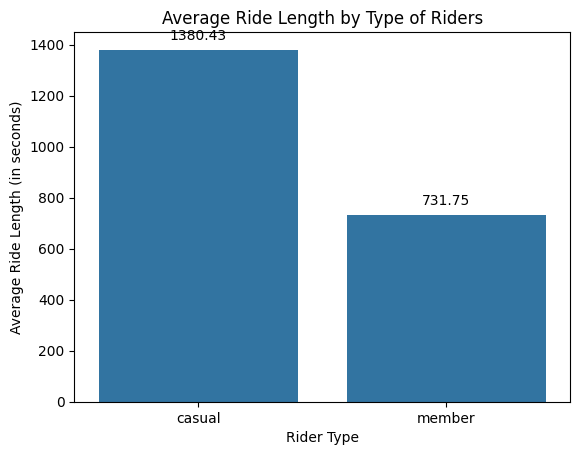

In [ ]:
ax = sns.barplot(x='member_casual', y=avg_ride_length_by_type_of_riders['ride_length'].\
                 dt.total_seconds(), data=avg_ride_length_by_type_of_riders)
plt.title('Average Ride Length by Type of Riders')
plt.xlabel('Rider Type')
plt.ylabel('Average Ride Length (in seconds)')

for p in ax.patches:
    ax.\
    annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2.,\
                                        p.get_height()), ha='center', va='center',\
                                          xytext=(0, 10), textcoords='offset points')

Variable depicting the "average ride length in seconds" by the rideable type.

In [ ]:
avg_ride_length_by_rideable_type = year_2023.\
    pivot_table(values='ride_length', index='rideable_type', aggfunc=(np.mean))

avg_ride_length_by_rideable_type = avg_ride_length_by_rideable_type.sort_values(by='ride_length', ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_2564\270131749.py:2: FutureWarning: The provided callable <function mean at 0x0000011E6F3C4220> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table(values='ride_length', index='rideable_type', aggfunc=(np.mean))


Barplot showing the member types by the "average ride length in seconds".

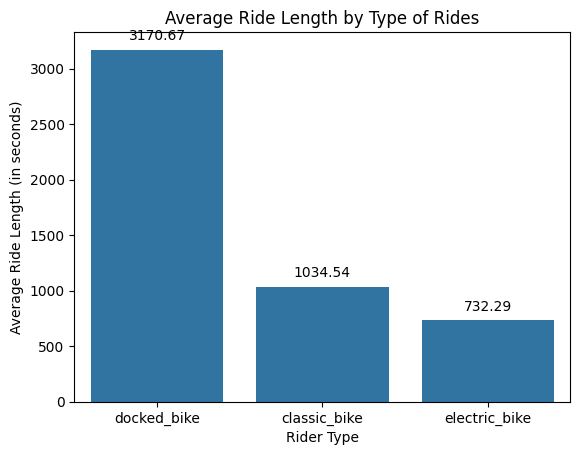

In [ ]:
ax = sns.barplot(x='rideable_type', y=avg_ride_length_by_rideable_type['ride_length'].\
                 dt.total_seconds(), data=avg_ride_length_by_rideable_type)
plt.title('Average Ride Length by Type of Rides')
plt.xlabel('Rider Type')
plt.ylabel('Average Ride Length (in seconds)')

for p in ax.patches:
    ax.\
    annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2.,\
                                        p.get_height()), ha='center', va='center',\
           
                                          xytext=(0, 10), textcoords='offset points')

Bar Chart showing Average Ride Length(seconds) by member type and rideable type.

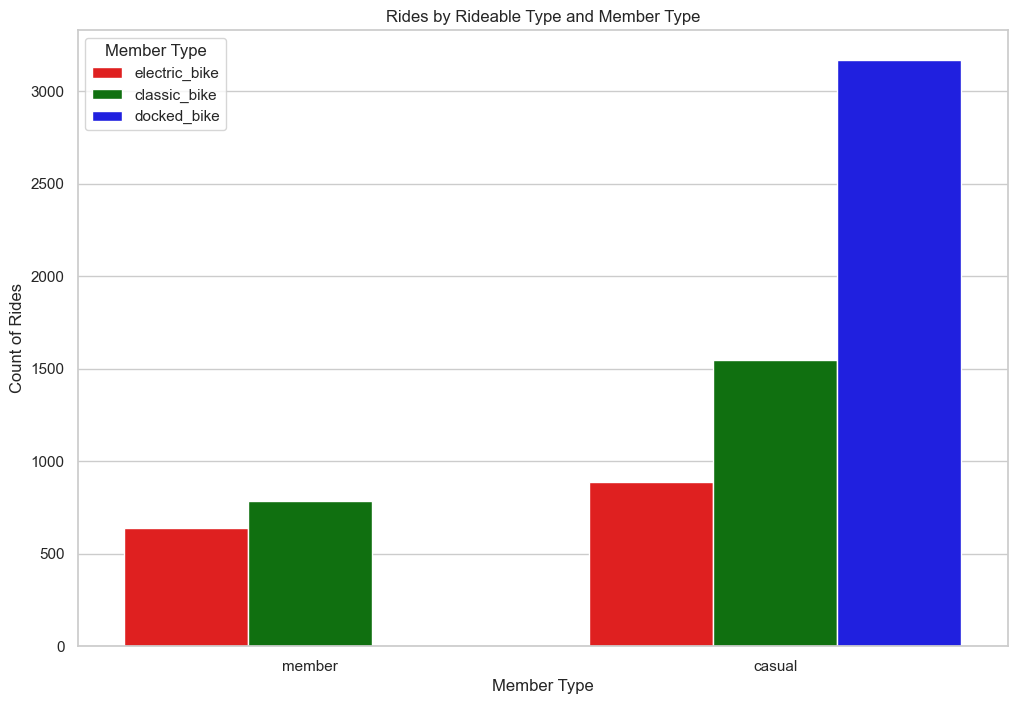

In [ ]:
rideable_type_by_member_type =  year_2023[['rideable_type', 'ride_length', 'member_casual']]

color = {'docked_bike':'Blue', 'classic_bike':'Green', 'electric_bike':'Red'}
ax = sns.barplot(x='member_casual', y=rideable_type_by_member_type['ride_length'].\
                 dt.total_seconds(), data=rideable_type_by_member_type, hue='rideable_type', palette=color, errorbar=None)

ax.set_title("Rides by Rideable Type and Member Type")
ax.set_xlabel("Member Type")
ax.set_ylabel("Count of Rides")

ax.legend(title="Member Type", loc='upper left')

Created a column called "hour_started" in the dataframe "year_2023".

This extracts the hour that the cyclists started riding. 

In [ ]:
year_2023['started_at'] = pd.to_datetime(year_2023['started_at'])

year_2023['hour_started'] = year_2023['started_at'].dt.floor('H')

year_2023['hour_started'] = year_2023['hour_started'].dt.hour

Created a line and bar plot that shows the rise and fall of the hours they started riding and also, the various member types.

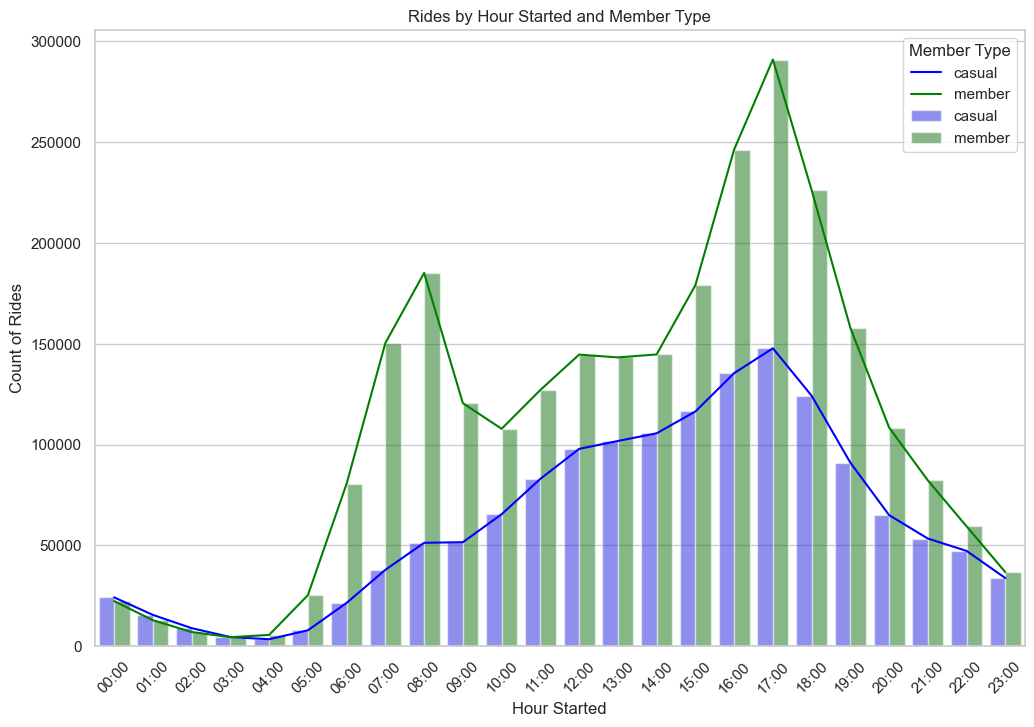

In [ ]:
hour_by_member_count = year_2023.groupby(['hour_started', 'member_casual']).size().reset_index(name='count')

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
color = {'member':'Green', 'casual':'Blue'}

# Line plot
sns.lineplot(data=hour_by_member_count, x='hour_started', y='count', palette=color, hue='member_casual', ax=ax, errorbar=None)

# Bar plot
sns.barplot(data=hour_by_member_count, x='hour_started', y='count', palette=color, hue='member_casual', ax=ax, alpha=0.5, errorbar=None)

# Set the x-axis ticks to represent each hour
ax.set_xticks(range(24))
ax.set_xticklabels([f'{hour:02d}:00' for hour in range(24)], rotation=45)

ax.set_title("Rides by Hour Started and Member Type")
ax.set_xlabel("Hour Started")
ax.set_ylabel("Count of Rides")

ax.legend(title="Member Type", loc='upper right')

Created a heatmap to visualize the member types by the "average ride length in seconds" and day of the week.

The thicker colours indicate the  higher number of rides for that type of member on that specific day of the week. The lighter colours indicate fewer number of rides for that type of member on that specific day of the week.

Text(117.24999999999999, 0.5, 'Member Type')

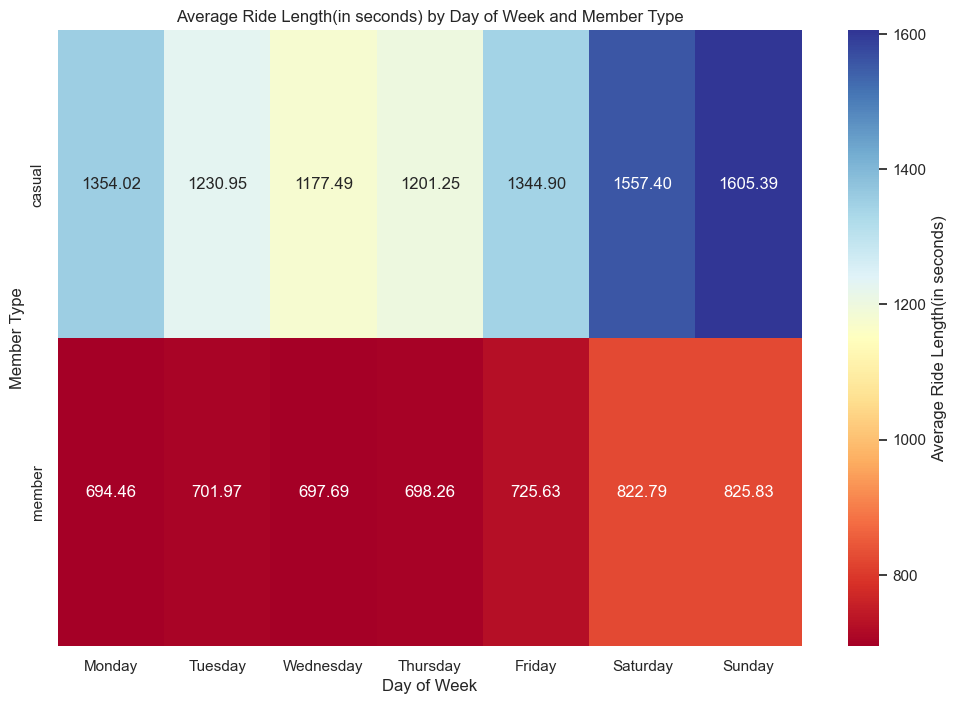

In [ ]:
avg_ride_length_by_day_of_week_seconds = avg_ride_length_by_day_of_week.apply(lambda x: x.dt.total_seconds())

avg_ride_length_by_day_of_week_seconds = pd.melt(avg_ride_length_by_day_of_week_seconds.reset_index(),\
                                                id_vars=["member_casual"], var_name="day_of_week",\
                                                value_name="avg_ride_length")
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

avg_ride_length_by_day_of_week_seconds['day_of_week'] = pd.Categorical(avg_ride_length_by_day_of_week_seconds['day_of_week'],\
                                                                       categories=days_order, ordered=True)

avg_ride_length_by_day_of_week_seconds = avg_ride_length_by_day_of_week_seconds.sort_values(by='day_of_week')

avg_ride_length_by_day_of_week_seconds = avg_ride_length_by_day_of_week_seconds.\
    pivot_table(index='member_casual', columns='day_of_week', values='avg_ride_length')

sns.set(rc={"figure.figsize":(12, 8)})
sns.heatmap(avg_ride_length_by_day_of_week_seconds, cmap='RdYlBu',\
            annot=True, fmt=".2f", cbar_kws={'label': 'Average Ride Length(in seconds)'})
plt.title('Average Ride Length(in seconds) by Day of Week and Member Type')
plt.xlabel('Day of Week')
plt.ylabel('Member Type')

Bar plot showing Number of Users by Day of Week.

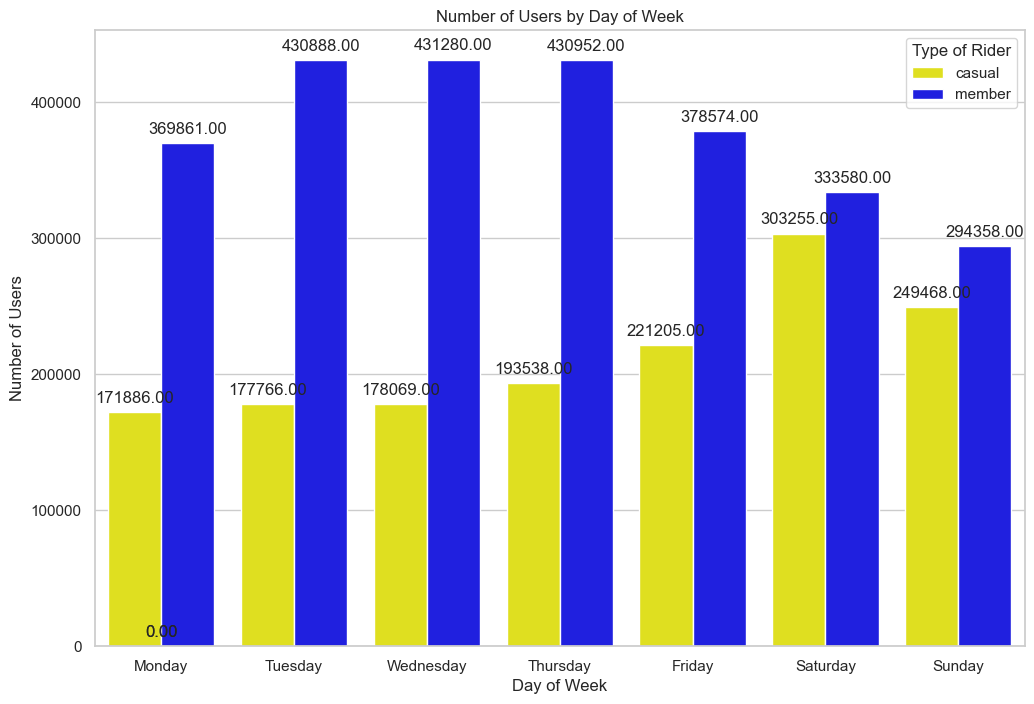

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

number_users_by_day_of_week_melt = pd.melt(number_users_by_day_of_week.reset_index(), id_vars=['day_of_week'],\
                                           value_vars=['casual', 'member'], var_name='member_casual', value_name='ride_count')
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot
ax = sns.barplot(data=number_users_by_day_of_week_melt, x='day_of_week',\
                 y='ride_count', hue='member_casual',order=days_order,\
                  palette={'member':'blue', 'casual':'yellow'})
# Customize the plot
plt.title('Number of Users by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Users')
plt.legend(title='Type of Rider')

for p in ax.patches:
    ax.\
    annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2.,\
                                        p.get_height()), ha='center', va='center',\
                                          xytext=(0, 10), textcoords='offset points')

Created a pivot table to group the month data by the type of members.

In [ ]:
no_of_users_by_month = year_2023.pivot_table(index='month', columns='member_casual', aggfunc='count',\
                                             fill_value=0, values='ride_id')

Bar plot showing Number of Users by Day of Week.

<Figure size 1200x800 with 0 Axes>

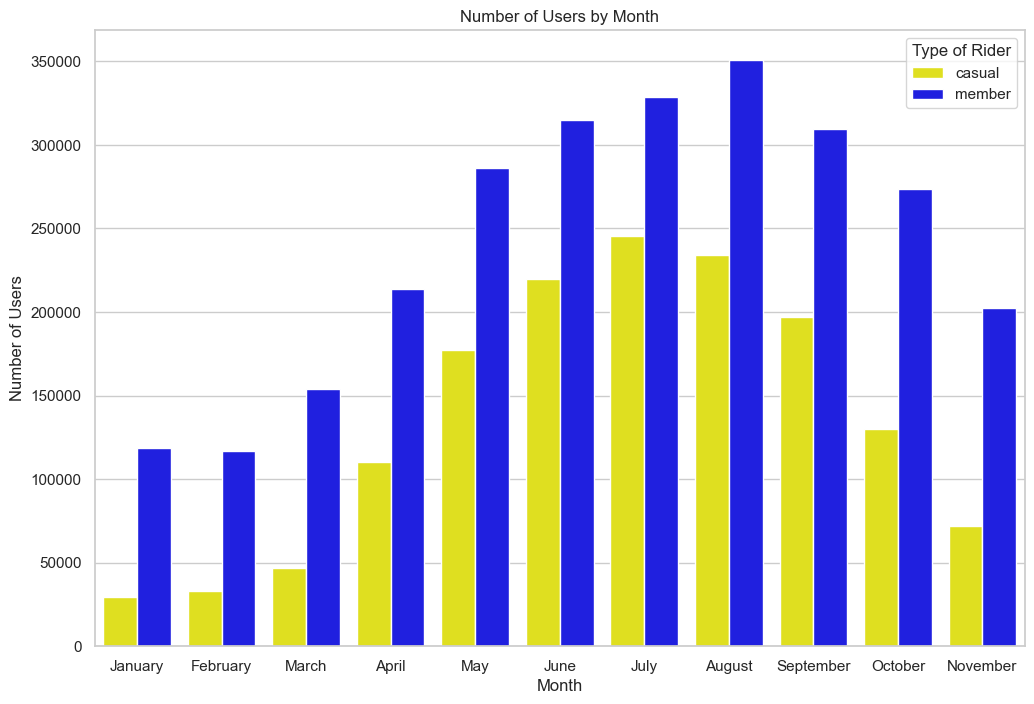

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

no_of_users_by_month_melt = pd.melt(no_of_users_by_month.reset_index(), id_vars=['month'],\
                                           value_vars=['casual', 'member'], var_name='member_casual', value_name='ride_count')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

# Create a bar plot
ax = sns.barplot(data=no_of_users_by_month_melt, x='month',\
                 y='ride_count', hue='member_casual',order=month_order,\
                  palette={'member':'blue', 'casual':'yellow'})
# Customize the plot
plt.title('Number of Users by Month')
plt.xticks()
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.legend(title='Type of Rider')

# Conclusion
In this study, a comprehensive analysis of Cyclistic's data was carried out to understand the following:
1. How annual members and casual riders use Cyclistic bikes differently.
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

#### Key Insights
* Cyclistic boasts an expansive membership base of over 3 million riders, reflecting its significant presence and widespread popularity among cycling enthusiasts.

* It boasts an impressive 1519 start stations and 1547 end stations, highlighting the extensive network and accessibility provided by Cyclistic

* The most frequented start and end station for Cyclistic riders is Streeter Dr & Grand Avenue, underscoring its popularity and importance within the network

* The maximum duration between the start and end of a ride was 23 hours, 59 minutes, and 59 seconds, highlighting the extensive range of ride lengths experienced by Cyclistic users..

* According to the data, Cyclistic offers three types of bikes: classic bikes, docked bikes, and electric bikes. Among these, the classic bike stands out as the most popular choice, with over 2.5 million rides recorded. In contrast, the docked bike is the least utilized, accounting for precisely 76,240 rides.. 

* Interestingly, when comparing the bike types with the average ride length (in seconds), it becomes evident that the docked bike was the most frequently used, while the electric bike was the least utilized. 

* Additionally, upon comparing the member type with the bike type, it was observed that annual members opted not to ride docked bikes at all, showing a preference for either classic or electric bikes. Conversely, casual riders showed a preference for docked bikes over classic or electric ones.

* Furthermore, it was revealed that both annual members and casual riders tend to ride between the hours of 3 PM and 5 PM.. 

* Additionally, it was noted that both annual members and casual riders predominantly cycle during the weekends, in contrast to other weekdays.

* The number of users per weekday peaked between Tuesday and Thursday for annual members, while for casual riders, it reached its highest point on Saturday.


**Recommendations**
1. It has been noted that casual riders spend more time on the bikes than annual members, although annual members tend to take more rides overall. To drive up the number of rides, an effective strategy would involve identifying the demographics of the casual rider majority and developing a subsidized plan specifically tailored to this group of riders.

2. In addition, leveraging digital media could be instrumental in converting casual riders into annual members. One effective tactic could involve equipping bikes designated for annual members with GPS technology, thereby enhancing the appeal of membership and encouraging casual riders to transition to annual membership.

3. Furthermore, Cyclistic should continue investing in enhancing its user interface by integrating more intuitive features, such as real-time traffic updates. This improvement can significantly enhance the user experience and attract more riders to the platform.

**The Limitations to this data which would help improve future decision making include:**
* Demographics
* Gender
* Occupation i.e student, graduate, etc. 
* Age group - younger vs older individuals may have different preferences for using cycling equipment